In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load csv
df = pd.read_csv('ThoracicSurgery_orig.csv')

In [3]:
# Checking the data for datatypes
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [4]:
# Converting Strings of True(T)/False(F) into integers of 1 and 0.

df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']] = \
(df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']] == 'T').astype(int)

In [5]:
df.head()
#Now we converted T/F(True / False) to 1/0

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60,0
1,2,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51,0
2,3,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59,0
3,4,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54,0
4,5,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73,1


In [6]:
#changing colums having sting value to int value (ex: DGN2 as 2, OC14 as 4)

df['DGN']= df.DGN.str[-1:].astype(int)
df['PRE6']=df.PRE6.str[-1:].astype(int)
df['PRE14']=df.PRE14.str[-1:].astype(int)

In [7]:
df.head()
#now we converted all data into numericals

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,2,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,4,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,5,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [8]:
print(df.isna().sum())

id         0
DGN        0
PRE4       0
PRE5       0
PRE6       0
PRE7       0
PRE8       0
PRE9       0
PRE10      0
PRE11      0
PRE14      0
PRE17      0
PRE19      0
PRE25      0
PRE30      0
PRE32      0
AGE        0
Risk1Yr    0
dtype: int64


In [9]:
#We dont have any missing values in the dataset

In [10]:
#Removing ID column 
#No use of ID column

df= df.drop(['id'],axis = 1)

In [11]:
#Renaming column names as per datSaset souce
df.columns = ['Diagnosis','FVC','FEV1','Performance','Pain','Haemoptysis','Dyspnoea','Cough','Weakness','Tumor_Size','Diabetes_Mellitus','MI_6mo','PAD','Smoking','Asthma','Age','Death_1yr']

In [12]:
df.head()
#columns names changed

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


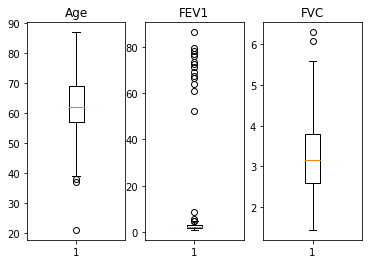

In [13]:
#Removing outliers as they interfere with data.
#Only 'Age','FEV1','FVC' can have outliers.Remaing all are 1's and 0's

fig, axs = plt.subplots(1,3)

axs[0].boxplot(df.Age)
axs[0].set_title('Age')

axs[1].boxplot(df.FEV1)
axs[1].set_title('FEV1')

axs[2].boxplot(df.FVC)
axs[2].set_title("FVC")

plt.show()

In [14]:
# 1 outlier in age(majority of date lies in the age 40 to 80 and one is early 20's)
#In FEV1 most of the data lies below 8 and 14 datapoints sbove 40 and 1 is beyond 8. so 15 outliers

#outlier = 1(age) and 15(FEV1)

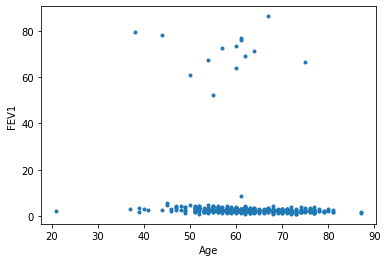

In [15]:
plt.plot(df.Age, df.FEV1, linestyle='none', marker='.')
plt.xlabel('Age')
plt.ylabel('FEV1')
plt.show()

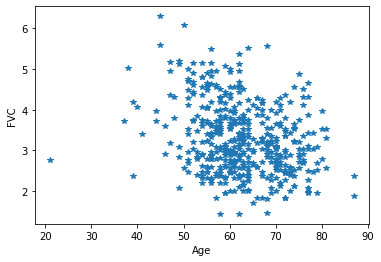

In [16]:
plt.plot(df.Age, df.FVC, linestyle='none', marker='*')
plt.xlabel('Age')
plt.ylabel('FVC')
plt.show()

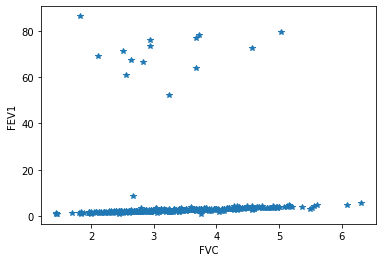

In [17]:
plt.plot(df.FVC, df.FEV1, linestyle='none', marker='*',)
plt.xlabel('FVC')
plt.ylabel('FEV1')
plt.show()

In [18]:
# Outliers for Age and FEV1 columns removed. 
# 15 from high FEV1. 1 from low Age.
df = df[df.Age > 30]
df = df[df.FEV1 < 8]

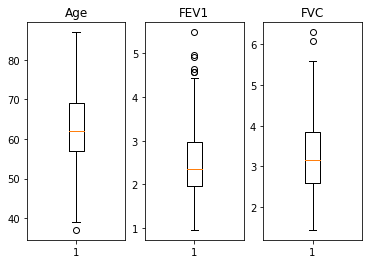

In [19]:
# Outliers?

fig, axs = plt.subplots(1,3)

axs[0].boxplot(df.Age)
axs[0].set_title('Age')

axs[1].boxplot(df.FEV1)
axs[1].set_title('FEV1')

axs[2].boxplot(df.FVC)
axs[2].set_title("FVC")
plt.show()

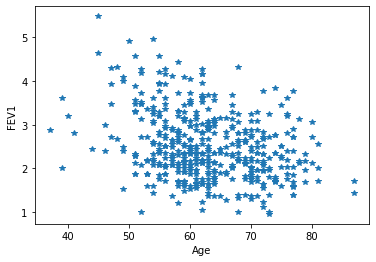

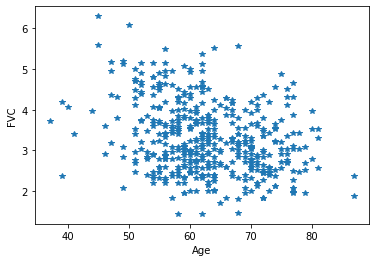

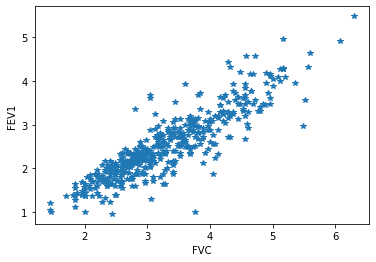

In [20]:
plt.plot(df.Age, df.FEV1, linestyle='none', marker='*')
plt.xlabel('Age')
plt.ylabel('FEV1')
plt.show()

plt.plot(df.Age, df.FVC, linestyle='none', marker='*')
plt.xlabel('Age')
plt.ylabel('FVC')
plt.show()

plt.plot(df.FVC, df.FEV1, linestyle='none', marker='*')
plt.xlabel('FVC')
plt.ylabel('FEV1')
plt.show()

In [21]:
# Original data set contained 470
len(df)

454

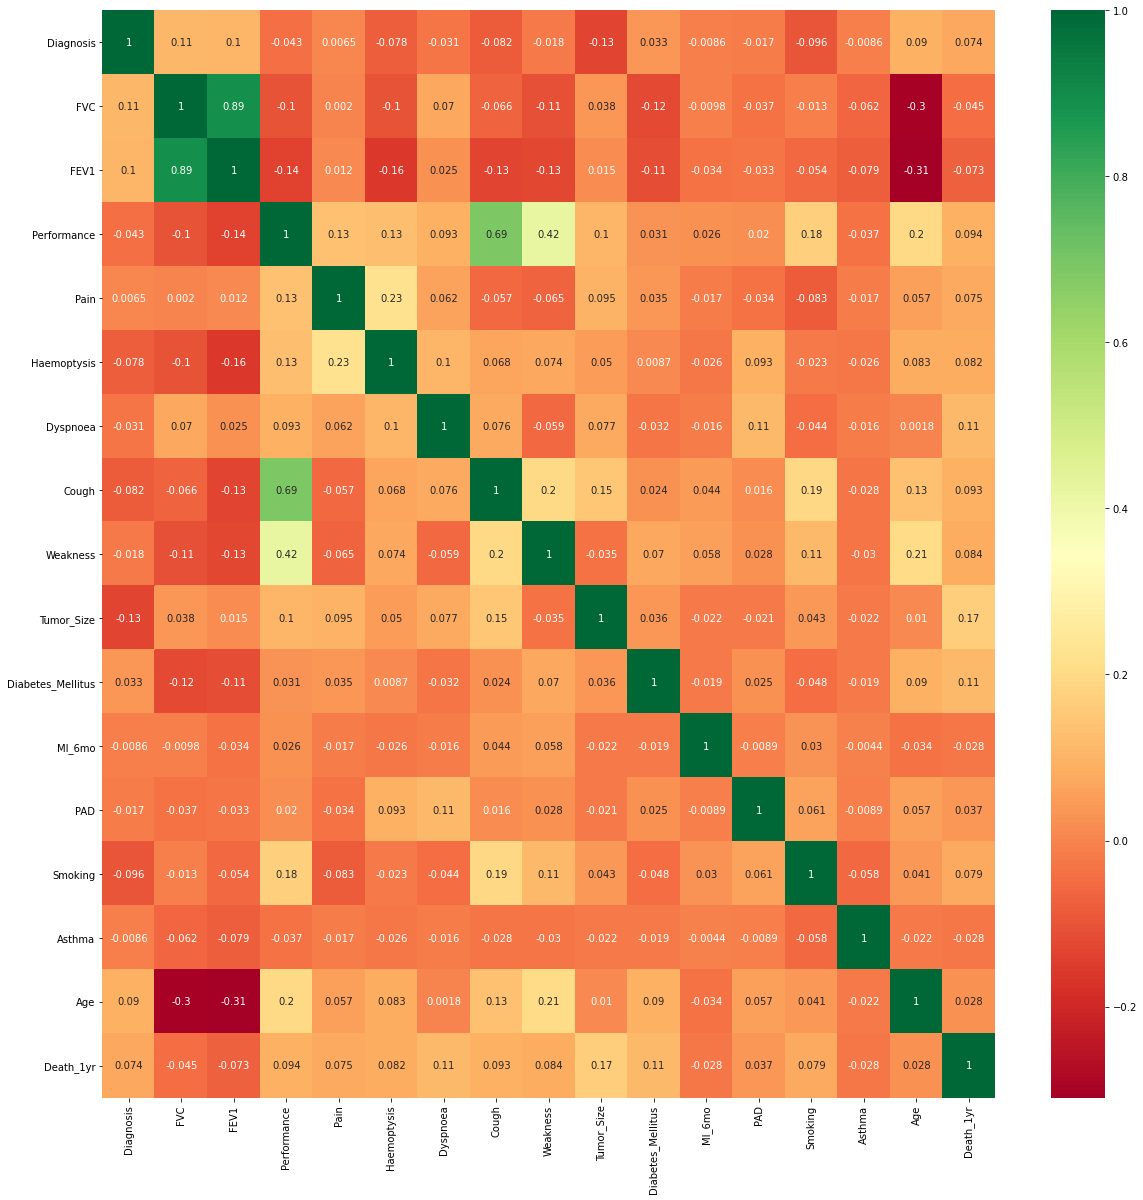

In [22]:
import seaborn as sns

x = df.iloc[:,0:16]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
# Export dataframe to csv
df.to_csv('ThoracicSurgery.csv', encoding='utf-8', index=False)

In [24]:
#Data splitiiing

df = pd.read_csv('ThoracicSurgery.csv')

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Spliiting data into test and train sets
x_train, x_test, y_train, y_test = train_test_split(df.drop('Death_1yr', axis=1), df['Death_1yr'], test_size=0.3, random_state=1)

print("The shape of the dataset is : ",df.shape)

#training data
print("The shape of the [x_train] is : ",x_train.shape)
print("The shape of the [x_test] is : ",x_test.shape)

#testing data
print("The shape of the [y_train] is : ",y_train.shape)
print("The shape of the [y_test] is : ",y_test.shape)

The shape of the dataset is :  (454, 17)
The shape of the [x_train] is :  (317, 16)
The shape of the [x_test] is :  (137, 16)
The shape of the [y_train] is :  (317,)
The shape of the [y_test] is :  (137,)


In [26]:
#Feature scaling

from sklearn.preprocessing import StandardScaler # MInMaxScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

In [27]:


from sklearn.linear_model import Perceptron,LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier#Bagging
from sklearn.ensemble import BaggingClassifier #Bagging
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier#Boosting
from sklearn.ensemble import VotingClassifier # STACKING
clf1=Perceptron(eta0=0.01)
clf2=LogisticRegression(C=1)
clf3=SVC(C=1,kernel='linear') #'rbf'
clf4=GaussianNB()
clf5=KNeighborsClassifier(n_neighbors=5)
clf6=DecisionTreeClassifier(max_depth=3)
clf7=RandomForestClassifier(n_estimators=100,max_depth=5)
clf8=ExtraTreesClassifier(n_estimators=100,max_depth=5)
clf9=BaggingClassifier(n_estimators=100)
clf10=AdaBoostClassifier(n_estimators=100)
clf11=GradientBoostingClassifier(n_estimators=100)
clf12=VotingClassifier(estimators=[('a',clf1),('b',clf2),('c',clf3),('d',clf4),
                                   ('e',clf5),('f',clf6),('g',clf7),('h',clf8),
                                   ('i',clf9),('j',clf10),('k',clf1)],
                       weights=None, # [1,2,1,1,5]
                       voting='hard') #'soft' 
############################## Train and pred
clf=[clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf8,clf9,clf10,clf11,clf12]
name=['PER','LR','SVM','BAYES','KNN','DT','RF','ET','BAG','ADA','GBC','ENS']
from sklearn.metrics import accuracy_score
import time
ACC={}
T={}
for model,names in zip(clf,name):
  st=time.time()
  model.fit(x_train_std,y_train)
  pred=model.predict(x_test_std)
  et=time.time()
  acc=accuracy_score(pred,y_test)
  ACC[names]=np.round(acc*100,1)
  T[names]=np.round((et-st)*1000,1) # in ms
for i in ACC.items():
  print(i[0],":-  ",i[1])

PER :-   74.5
LR :-   75.9
SVM :-   75.9
BAYES :-   24.8
KNN :-   75.9
DT :-   75.9
RF :-   75.9
ET :-   76.6
BAG :-   77.4
ADA :-   75.2
GBC :-   75.9
ENS :-   75.9


<BarContainer object of 12 artists>

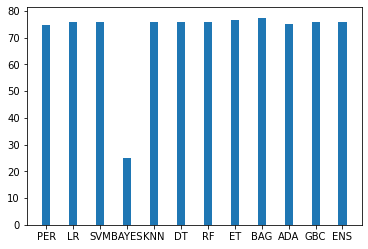

In [28]:

import matplotlib.pyplot as plt
plt.bar(ACC.keys(),ACC.values(),width=0.3)

Text(0.5, 1.0, 'CPU execution time (msec.)')

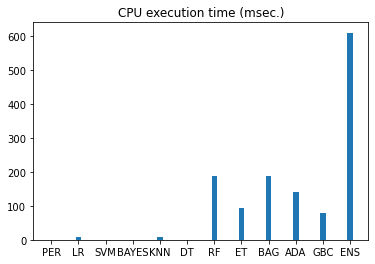

In [29]:
plt.bar(T.keys(),T.values(),width=0.2)
plt.title('CPU execution time (msec.)')

In [30]:
############ Feature importances 
#ET and BAG
imp=clf8.feature_importances_
print('Feature importance by Extra Tree Classifier')
for i,v in enumerate(imp):
  print('Feature %d, importance=%.2f'%(i+1,v))



Feature importance by Extra Tree Classifier
Feature 1, importance=0.11
Feature 2, importance=0.06
Feature 3, importance=0.07
Feature 4, importance=0.07
Feature 5, importance=0.05
Feature 6, importance=0.06
Feature 7, importance=0.11
Feature 8, importance=0.06
Feature 9, importance=0.08
Feature 10, importance=0.13
Feature 11, importance=0.08
Feature 12, importance=0.00
Feature 13, importance=0.02
Feature 14, importance=0.04
Feature 15, importance=0.00
Feature 16, importance=0.06


In [31]:
#f1(Diagnosis),f7(Dyspnoea),f9(Weakness),f10(Tumor size)

In [32]:
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [33]:
############ FEATURE SELECTION
from sklearn.feature_selection import SelectFromModel
model=SelectFromModel(ExtraTreesClassifier(n_estimators=100,max_depth=None),
                      prefit=False,
                      max_features=4)
model.fit(x,y)
x_new=model.transform(x)
print(x.shape)
print(x_new.shape)

(454, 16)
(454, 4)


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,df['Death_1yr'],
                                               test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler # MInMaxScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

In [35]:
#Extra tree clssifier


from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
y_pred_train=etc.predict(x_train)
y_pred_test=etc.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_Acc=accuracy_score(y_test,y_pred_test)
print(train_acc)
print(test_Acc)

1.0
0.7883211678832117


In [37]:
etc.fit(x_train_std,y_train)
y_pred_train=etc.predict(x_train_std)
y_pred_test=etc.predict(x_test_std)
train_acc=accuracy_score(y_train,y_pred_train)
test_Acc=accuracy_score(y_test,y_pred_test)
print(train_acc)
print(test_Acc)

1.0
0.7956204379562044


In [38]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.97      0.89       111
           1       0.25      0.04      0.07        26

    accuracy                           0.80       137
   macro avg       0.53      0.51      0.48       137
weighted avg       0.71      0.80      0.73       137



In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_test)
print(cm)

[[108   3]
 [ 25   1]]


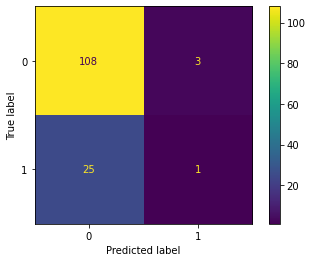

In [40]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(etc,x_test_std,y_test)

In [41]:



#GaussianNB

from sklearn.naive_bayes import GaussianNB
x_train,x_test,y_train,y_test=train_test_split(x_new,df['Death_1yr'],
                                               test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler # MInMaxScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)


from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train,y_train)
y_pred_train=gb.predict(x_train)
y_pred_test=gb.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_Acc=accuracy_score(y_test,y_pred_test)
print(train_acc)
print(test_Acc)

0.8675078864353313
0.7737226277372263


In [43]:
gb.fit(x_train_std,y_train)
y_pred_train=gb.predict(x_train_std)
y_pred_test=gb.predict(x_test_std)
train_acc=accuracy_score(y_train,y_pred_train)
test_Acc=accuracy_score(y_test,y_pred_test)
print(train_acc)
print(test_Acc)

0.8675078864353313
0.7737226277372263


In [44]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       111
           1       0.00      0.00      0.00        26

    accuracy                           0.77       137
   macro avg       0.40      0.48      0.44       137
weighted avg       0.65      0.77      0.71       137



In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_test)
print(cm)

[[106   5]
 [ 26   0]]


GaussianNB()


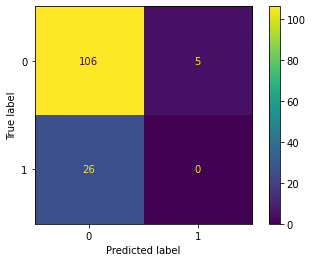

In [46]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gb,x_test_std,y_test)
print(gb)

In [47]:

#Bagging Classifier

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,df['Death_1yr'],
                                               test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler # MInMaxScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)


from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier()
bg.fit(x_train,y_train)
y_pred_train=etc.predict(x_train)
y_pred_test=etc.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_Acc=accuracy_score(y_test,y_pred_test)
print(train_acc)
print(test_Acc)

0.2082018927444795
0.2846715328467153


In [49]:
bg.fit(x_train_std,y_train)
y_pred_train=bg.predict(x_train_std)
y_pred_test=bg.predict(x_test_std)
train_acc=accuracy_score(y_train,y_pred_train)
test_Acc=accuracy_score(y_test,y_pred_test)
print(train_acc)
print(test_Acc)

0.9779179810725552
0.7737226277372263


In [50]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       111
           1       0.22      0.08      0.11        26

    accuracy                           0.77       137
   macro avg       0.52      0.51      0.49       137
weighted avg       0.70      0.77      0.73       137



In [51]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_test)
print(cm)

[[104   7]
 [ 24   2]]


BaggingClassifier()


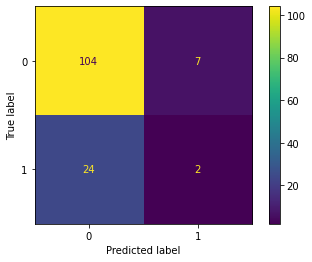

In [52]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(bg,x_test_std,y_test)
print(bg)